# Workflows with LLM functions

## Introduction

In this computational document we discuss and demonstrate the inclusion and integration of
Large Language Model (LLM) functions into different types of Raku workflows.

Since LLMs hallucinate results, it becomes necessary to manipulate their inputs, the outputs, or both. 
Therefore, having a system for managing, coordinating, and streamlining LLM requests, 
along with methods for incorporating these requests into the "playgrounds" of a certain programming language, 
would be highly beneficial.

This is what the package 
["LLMFunctionObjects"](https://pypi.org/project/LLMFunctionObjects), [AAp1],
aims to do in Python and Python's ecosystem. 

### Dynamic duo

LLMs are celebrated for producing good to great results, but they have a few big issues. 
The content they generate can be inconsistent, prone to hallucination, and sometimes biased, making it unreliable.
The form, or stylistic structure, may also vary widely, with a lack of determinism and sensitivity 
to hyperparameters contributing to challenges in reproducibility. 
Moreover, customization and debugging can be complex due to these inconsistencies. 

The lack of reliability and reproducibility in both content and form underscore
the need for streamlining, managing, and transforming LLM inquiries and results.

Python, has fairly good tools for text manipulation, hence it can complement LLMs well. 
While Raku might not be everyone's favorite language and has certain intricacies that take some getting used to, 
its popularity is hard to ignore. ***Creating well-crafted pairings of Python with LLMs 
can speed up a lot of educational and research activities that require software support.***

"LLMFunctionObjects" establishes a (object-oriented programming) connection between Python's capabilities and the vast potential of LLMs. 
Ideally that promising LLM-Python pairing is further strengthened and enriched into something that some might call a "dynamic duo."

**Remark:** For an example of a mature effort with the same mission (and naming, and design) see [SW1] and [WRIp1].

**Remark:** And yes, for Mathematica or Wolfram Language (WL) it can be also said:
*Creating well-crafted pairings of WL with LLMs can broaden WL's adoption and utilization.*
WL, though, is much better positioned for integrating with multi-modal LLMs because of WL's
ability to create and manipulate symbolic representation of different types of objects 
(audio, images, and video included), and WL's very advanced notebook technology.

### Standard enhancements

To enhance the pairing of Python with LLMs, it is *also* essential to have:
- LLM prompt repository with many well documented prompts
- Polyglot parsing of dates, numbers, regular expressions, data formats, grammar specs, etc.  

For an example of the former see the Wolfram Prompt Repository, [WRIr1], or the Python package "LLMPrompts", [AAp2].
For examples of the latter see the sub-parsers of "LLMFunctionObjects", [AAp1].

### Interactivity is needed

Generally speaking, using LLM functions in Python (or Mathematica, or R, or Raku) requires 
good tools for [Read Eval Print Loop (REPL)](https://en.wikipedia.org/wiki/Read–eval–print_loop).

Notebooks are best for LLM utilization because notebooks offer an interactive environment where
LLM whisperers, LLM tamers, neural net navigators, and bot wranglers can write code, run it, see the results, 
and tweak the code -- all in one place.

Python currently has (at least) three notebook solutions: 
1. ["IPython"](https://ipython.org/) with the [Jupyter framework](https://jupyter.org)
2. [RStudio notebooks](https://rmarkdown.rstudio.com/lesson-10.html) (with Python cells)
3. [Python external evaluation cells](https://www.wolfram.com/language/12/external-system-integration/evaluate-python-in-a-notebook.html) in [Mathematica notebooks](https://www.wolfram.com/mathematica)

**Remark:** Also see [Quarto](https://quarto.org) that combines different notebook solutions.

"Just" using scripts is an option, but since LLM queries have certain time lag and usage expenses, it is not a good one:
- We cannot see the intermediate results and adjust accordingly
- Multiple (slow) executions would be needed to get desired results


### Article structure

Here are sections of the article:

- **General structure of LLM-based workflows**   
  ... Formulating and visualizing the overall process used in all LLM workflow examples.
- **Plot data**   
  ... Plotting LLM-retrieved data.
- **Normalizing outputs**   
  ... Examples of how LLM-function outputs can be "normalized" using other LLM functions.
- **Conversion to Python objects**   
  ... Conversion of LLM-outputs in Python physical units objects.
- **Chemical formulas**   
  ... Retrieving chemical formulas and investigating them.
- **Making (embedded) Mermaid diagrams**   
  ... Straightforward application of LLM abilities and literate programming tools.
- **Named entity recognition**  
  ... How to obtain music album names and release dates and tabulate or plot them.
- **Statistics of output data types**   
  ... Illustration why programmers need streamlining solutions for LLMs.
- **Other workflows**   
  ... Outline of other workflows using LLM chat objects. (Also provided by "LLM::Functions".)

**Remark:** Most of the sections have a sub-section titled "Exercise questions". 
The reader is the secondary target audience for those. The primary target are LLMs to respond to them.
(Another article is going to discuss the staging and evaluating of those LLM answers.) 

### Packages and LLM access

The following Python packages used below:

In [40]:
from LLMFunctionObjects import *
from DataTypeSystem import *
import json
import pandas
import astropy
import chempy

"Out of the box"
["LLMFunctions"](https://pypi.org/project/LLMFunctions) uses
["openai"](https://pypi.org/project/openai/), [OAIp1], and
["google-generativeai"](https://pypi.org/project/google-generativeai/), [GAIp1].
Other LLM access packages can be utilized via appropriate LLM configurations.

The LLM functions below use the LLM authorization tokens that are kept
in the OS environment. See [OAIp1] and [GAOp1] for details how to setup LLM access.

### Other versions

The content of the article was previously developed for Raku and Wolfram Language (WL). 
See the notebooks:
- ["Workflows with LLM functions (in Raku)"](https://community.wolfram.com/groups/-/m/t/2982320) 
- ["Workflows with LLM functions (in WL)"](https://community.wolfram.com/groups/-/m/t/2983602)

----

## General structure of LLM-based workflows

All systematic approaches of unfolding and refining workflows based on LLM functions, 
will include several decision points and iterations to ensure satisfactory results.

This flowchart outlines such a systematic approach:

```mermaid
graph TD
    A([Start]) --> HumanWorkflow[Outline a workflow] --> MakeLLMFuncs["Make LLM function(s)"]
    MakeLLMFuncs --> MakePipeline[Make pipeline]
    MakePipeline --> LLMEval["Evaluate LLM function(s)"]
    LLMEval --> HumanAsses[Asses LLM's Outputs]
    HumanAsses --> GoodLLMQ{Good or workable<br>results?}
    GoodLLMQ --> |No| CanProgramQ{Can you<br>programmatically<br>change the<br>outputs?}
    CanProgramQ --> |No| KnowVerb{Can you<br>verbalize<br>the required<br>change?}
    KnowVerb --> |No| KnowRule{Can you<br>specify the change<br>as a set of training<br>rules?}
    KnowVerb --> |Yes| ShouldAddLLMQ{"Is it better to<br>make additional<br>LLM function(s)?"}
    ShouldAddLLMQ --> |Yes| AddLLM["Make additional<br>LLM function(s)"]
    AddLLM --> MakePipeline
    ShouldAddLLMQ --> |No| ChangePrompt["Change prompt(s)<br>of LLM function(s)"]
    ChangePrompt --> ChangeOutputDescr["Change output description(s)<br>of LLM function(s)"]
    ChangeOutputDescr --> MakeLLMFuncs
    CanProgramQ --> |Yes| ApplySubParser["Apply suitable (sub-)parsers"]
    ApplySubParser --> HumanMassageOutput[Program output transformations]
    HumanMassageOutput --> MakePipeline
    GoodLLMQ --> |Yes| OverallGood{"Overall<br>satisfactory<br>(robust enough)<br>results?"}
    OverallGood --> |Yes| End([End])
    OverallGood --> |No| DifferentModelQ{"Willing and able<br>to apply<br>different model(s) or<br>model parameters?"}
    DifferentModelQ --> |No| HumanWorkflow
    DifferentModelQ --> |Yes| ChangeModel[Change model<br>or model parameters]
    ChangeModel --> MakeLLMFuncs
    KnowRule --> |Yes| LLMExamFunc[Make LLM example function]
    KnowRule --> |No| HumanWorkflow
    LLMExamFunc --> MakePipeline     
```


Here is a corresponding description:

- **Start**: The beginning of the process.
- **Outline a workflow**: The stage where a human outlines a general workflow for the process.
- **Make LLM function(s)**: Creation of specific LLM function(s).
- **Make pipeline**: Construction of a pipeline to integrate the LLM function(s).
- **Evaluate LLM function(s)**: Evaluation of the created LLM function(s).
- **Asses LLM's Outputs**: A human assesses the outputs from the LLM.
- **Good or workable results?**: A decision point to check whether the results are good or workable.
- **Can you programmatically change the outputs?**: If not satisfactory, a decision point to check if the outputs can be changed programmatically.
  - *The human acts like a real programmer.*
- **Can you verbalize the required change?**: If not programmable, a decision point to check if the changes can be verbalized.
  - *The human programming is delegated to the LLM.*
- **Can you specify the change as a set of training rules?**: If not verbalizable, a decision point to check if the change can be specified as training rules.
  - *The human cannot program or verbalize the required changes, but can provide examples of those changes.*
- **Is it better to make additional LLM function(s)?**: If changes can be verbalized, a decision point to check whether it is better to make additional LLM function(s), or it is better to change prompts or output descriptions. 
- **Make additional LLM function(s)**: Make additional LLM function(s) (since it is considered to be the better option.)  
- **Change prompts of LLM function(s)**: Change prompts of already created LLM function(s).
- **Change output description(s) of LLM function(s)**: Change output description(s) of already created LLM function(s).
- **Apply suitable (sub-)parsers**: If changes can be programmed, choose, or program, and apply suitable parser(s) or sub-parser(s) for LLM's outputs.
- **Program output transformations**: Transform the outputs of the (sub-)parser(s) programmatically.
- **Overall satisfactory (robust enough) results?**: A decision point to assess whether the results are overall satisfactory.
  - *This should include evaluation or estimate how robust and reproducible the results are.*
- **Willing and able to apply different model(s) or model parameters?**: A decision point should the LLM functions pipeline should evaluated or tested with different LLM model or model parameters.
  - *In view of robustness and reproducibility, systematic change of LLM models and LLM functions pipeline inputs should be considered.* 
- **Change model or model parameters**: If willing to change models or model parameters then do so.
  - *Different models can have different adherence to prompt specs, evaluation speeds, and evaluation prices.*
- **Make LLM example function**: If changes can be specified as training rules, make an example function for the LLM.
- **End**: The end of the process.

To summarise:
- We work within an iterative process for refining the results of LLM function(s) pipeline.
- If the overall results are not satisfactory, we loop back to the outlining workflow stage.
- If additional LLM functions are made, we return to the pipeline creation stage.
- If prompts or output descriptions are changed, we return the LLM function(s) creation stage. 
- Our (human) inability or unwillingness to program transformations has a few decision steps for delegation to LLMs.

**Remark:** We leave as exercises to the reader to see how the workflows programmed below fit the flowchart above.

**Remark:** The mapping of the workflow code below onto the flowchart can be made using LLMs. 

------

## Plot data

**Workflow:** Consider a workflow with the following steps:

1. Request an LLM to produce in JSON format a dictionary of a certain numerical quantity during a certain year.
2. The corresponding LLM function converts the JSON text into Python data structure.
3. Print or summarize obtained data in tabular form.
4. A plot is made with the obtained data.

Here is a general quantities finder LLM function:

In [2]:
qf3 = llm_function(
        prompt= lambda a, b, c: f"What are the {a} of {b} in {c}? Give the result as name-value pairs in JSON format.",
        e = llm_configuration('openai', temperature =0.7),
        form = sub_parser('JSON', drop=True));

### Countries GDP

Consider finding and plotting the GDP of top 10 largest countries:

In [3]:
gdp1 = qf3('GDP', 'top 10 largest countries', '2022')
gdp1

[{'China': 18.1,
  'United States': 22.6,
  'India': 5.8,
  'Japan': 5.3,
  'Germany': 4.7,
  'United Kingdom': 4.4,
  'France': 3.9,
  'Italy': 3.6,
  'Brazil': 3.1,
  'Canada': 2.3}]

In order to make a corresponding table (data frame) we select form the LLM function's response only the elements that are dictionaries:

In [4]:
gdp1f = list(filter(lambda x: isinstance(x, dict), gdp1))
gdp1f

[{'China': 18.1,
  'United States': 22.6,
  'India': 5.8,
  'Japan': 5.3,
  'Germany': 4.7,
  'United Kingdom': 4.4,
  'France': 3.9,
  'Italy': 3.6,
  'Brazil': 3.1,
  'Canada': 2.3}]

Here is the corresponding table (data frame):

In [5]:
pandas.DataFrame.from_dict(gdp1f).transpose()

,0
China,18.1
United States,22.6
India,5.8
Japan,5.3
Germany,4.7
United Kingdom,4.4
France,3.9
Italy,3.6
Brazil,3.1
Canada,2.3


Instead of programmatically manipulating the LLM function result we can request the LLM to produce the desired transformation (with another LLM function):   

In [6]:
ftc = llm_function(lambda x: f"Convert the JSON dictionary {x} into two column table with column names Name and Value. Show the result in JSON format.", form = sub_parser("JSON",drop=True))
ftc(gdp1)

[{'Name': 'China', 'Value': 18.1},
 {'Name': 'United States', 'Value': 22.6},
 {'Name': 'India', 'Value': 5.8},
 {'Name': 'Japan', 'Value': 5.3},
 {'Name': 'Germany', 'Value': 4.7},
 {'Name': 'United Kingdom', 'Value': 4.4},
 {'Name': 'France', 'Value': 3.9},
 {'Name': 'Italy', 'Value': 3.6},
 {'Name': 'Brazil', 'Value': 3.1},
 {'Name': 'Canada', 'Value': 2.3}]

Here is the table (data frame) for the result above:

In [7]:
dfGDP = pandas.DataFrame.from_dict(_)
dfGDP

,Name,Value
0,China,18.1
1,United States,22.6
2,India,5.8
3,Japan,5.3
4,Germany,4.7
5,United Kingdom,4.4
6,France,3.9
7,Italy,3.6
8,Brazil,3.1
9,Canada,2.3


**Remark:** We can define the transformation function to produce Python code, but actually requires more notebook-manual steps. Here is the corresponding definition:
```python
ftc = llm_function(lambda x: f"Convert the JSON dictionary {x} into two column Python pandas data frame with column names Name and Value. Show the result in Python code.")
```

Here is a plot attempt:

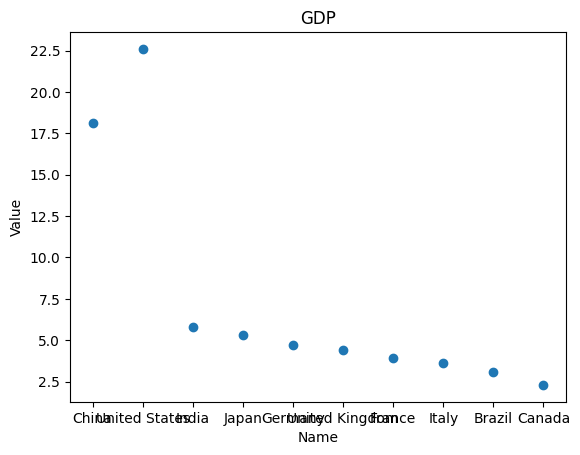

In [8]:
import matplotlib.pyplot as plt

def plot_points(df, title=''):
    plt.plot(df['Name'], df['Value'], 'o')
    plt.xlabel('Name')
    plt.ylabel('Value')
    plt.title(title)
    plt.show()
    
plot_points(dfGDP, 'GDP')

Here we obtain the GDP for all countries and make the corresponding Pareto principle plot:

In [9]:
gdp2 = qf3('GDP', 'top 30 countries', '2018')
gdp2

[{'United States': 20494100,
  'China': 13608100,
  'Japan': 4970910,
  'Germany': 3996750,
  'United Kingdom': 2825210,
  'India': 2719720,
  'France': 2710950,
  'Italy': 2086910,
  'Brazil': 1885510,
  'Canada': 1708610,
  'Russia': 1708490,
  'South Korea': 1667120,
  'Spain': 1437040,
  'Australia': 1329180,
  'Mexico': 1238840,
  'Indonesia': 1049870,
  'Netherlands': 929140,
  'Turkey': 851102,
  'Switzerland': 705047,
  'Saudi Arabia': 683827,
  'Argentina': 637486,
  'Sweden': 538575,
  'Poland': 586313,
  'Belgium': 536055,
  'Thailand': 502938,
  'Iran': 454674,
  'Austria': 455450,
  'Norway': 434951,
  'United Arab Emirates': 414371,
  'Nigeria': 397472,
  'South Africa': 366057}]

Here is a plot attempt:

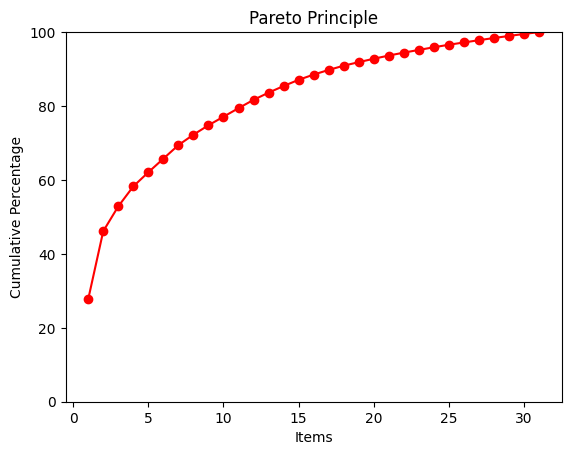

In [10]:
import numpy as np

def plot_pareto(numbers):
    numbers = np.array(numbers)
    sorted_indices = numbers.argsort()[::-1]
    sorted_numbers = numbers[sorted_indices]
    cumulative_sum = np.cumsum(sorted_numbers)

    plt.plot(range(1, len(numbers) + 1), cumulative_sum / cumulative_sum[-1] * 100, 'ro-')
    plt.xlabel('Items')
    plt.ylabel('Cumulative Percentage')
    plt.title('Pareto Principle')
    plt.ylim(0, 100)
    plt.show()


plot_pareto(list(gdp2[0].values()))    

Here is another one based on the most frequent "non-compliant" output form:

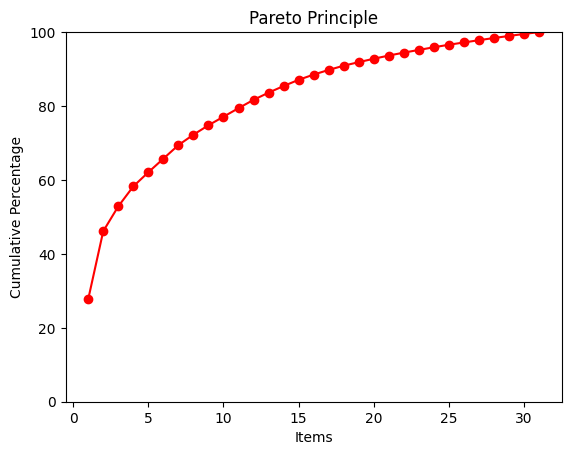

In [11]:
plot_pareto([v for v in gdp2[0].values() if isinstance(v, float|int)])

### Gold medals

Here we retrieve data for gold Olympic medal counts:

In [12]:
gmd = qf3("counts of Olympic gold medals", "countries", "the last decade")
gmd

[{'United States': 103,
  'China': 88,
  'Great Britain': 68,
  'Russia': 49,
  'Germany': 42,
  'Japan': 37,
  'Australia': 30,
  'France': 29,
  'South Korea': 28,
  'Italy': 26}]

Here is a corresponding data frame:

In [13]:
gmdf = list(filter(lambda x: isinstance(x, dict), gmd))
gmdf = [ {"Name" : k, "Value" : v} for k, v in gmdf[0].items()]
dfGM = pandas.DataFrame.from_dict(gmdf)
dfGM

,Name,Value
0,United States,103
1,China,88
2,Great Britain,68
3,Russia,49
4,Germany,42
5,Japan,37
6,Australia,30
7,France,29
8,South Korea,28
9,Italy,26


Here is a plot attempt:

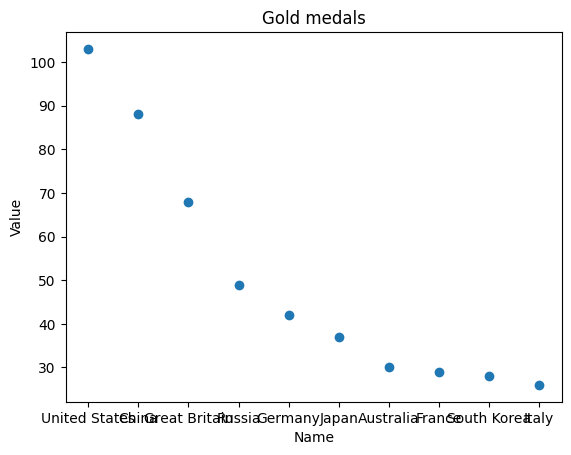

In [14]:
plot_points(dfGM, "Gold medals")

### Exercise questions

- How does the code in this section maps on the flowchart in the section "General structure of LLM-based workflows"?
- Come up with other argument values for the three slots of `&qf3` and execute the workflow. 

-------

## Refining and adapting outputs

**Workflow:** We want to transform text into a specific format that is both expected and ready for immediate processing.
For example:

- Remove certain pesky symbols and strings from LLM results
- Put a Python (or JSON) dataset into a tabular data format suitable for immediate rendering
- Convert a dataset into a plotting language spec

### Normalizing numerical outputs

The following *LLM example* function "normalizes" outputs that have numerical values with certain number
localization or currency units:

In [15]:
fNumNorm = llm_example_function({'1,034': '1_034', 
                                 '13,003,553': '13_003_553', 
                                 '9,323,003,553': '9_323_003_553',
                                 '43 thousand USD': '23E3', 
                                 '3.9 thousand' : '3.9E3',
                                 '23 million USD': '23E6', 
                                 '2.3 million': '2.3E6',
                                 '3.2343 trillion USD': '3.2343E12', 
                                 '0.3 trillion' : '0.3E12'})

This LLM function can be useful to transform outputs of other LLM functions (before utilizing those outputs further.)

Here is an example of normalizing the results of countries GDP query output:

In [16]:
gdpRes = "{Brazil : 2.6 trillion, China : 17.3 trillion, France : 2.7 trillion USD, Germany : 3.9 trillion, India : 8.2 trillion, Japan : 5.3 trillion}"
fNumNorm(gdpRes)

' {Brazil : 2.6E12, China : 17.3E12, France : 2.7E12, Germany : 3.9E12, India : 8.2E12, Japan : 5.3E12}'

### Dataset into tabular format

Here is an LLM function that transforms the plain text data above into a GitHub Markdown table:

In [17]:
fgt = llm_function(lambda x: f"Transform the plain-text table {x} into a GitHub table.")

Here is an example application:

In [18]:
from IPython.display import display_markdown

gdp2f = fgt(' '.join([str(x) for x in gdp1]))
display_markdown(gdp2f, raw=True)



| Country        | Population (in millions) |
|----------------|-------------------------|
| China          | 18.1                    |
| United States  | 22.6                    |
| India          | 5.8                     |
| Japan          | 5.3                     |
| Germany        | 4.7                     |
| United Kingdom | 4.4                     |
| France         | 3.9                     |
| Italy          | 3.6                     |
| Brazil         | 3.1                     |
| Canada         | 2.3                     |

Let us define a function that translates the dataset by converting to JSON format first,
and then converting into a GitHub Markdown table:

In [19]:
fjgt = llm_function(lambda x: f"Transform the JSON data {x} into a GitHub table.")

Here is an example application:

In [20]:
display_markdown(fjgt(json.dumps(gmd[0])), raw=True)



| Country      | Medals |
|--------------|--------|
| United States| 103    |
| China        | 88     |
| Great Britain| 68     |
| Russia       | 49     |
| Germany      | 42     |
| Japan        | 37     |
| Australia    | 30     |
| France       | 29     |
| South Korea  | 28     |
| Italy        | 26     |

### Dataset into diagrams

Here we define a reformatting function that translates JSON data into Python code for plotting different types of diagrams:

In [21]:
fjp = llm_function(lambda a, b: f"Transform the JSON data {a} into a Python code to plot a {b}.")

Here we convert the gold medals data into a pie chart Python code:

In [22]:
codeRes = fjp(json.dumps(gmd), 'pie chart')
print(codeRes)



import matplotlib.pyplot as plt

data = [{"United States": 103, "China": 88, "Great Britain": 68, "Russia": 49, "Germany": 42, "Japan": 37, "Australia": 30, "France": 29, "South Korea": 28, "Italy": 26}]

# Extract country names and medal counts from data
countries = list(data[0].keys())
medal_counts = list(data[0].values())

# Plot pie chart
plt.pie(medal_counts, labels=countries, autopct='%1.1f%%')
plt.title("Medal Counts by Country")
plt.show()


Here the generated code above is evaluated:

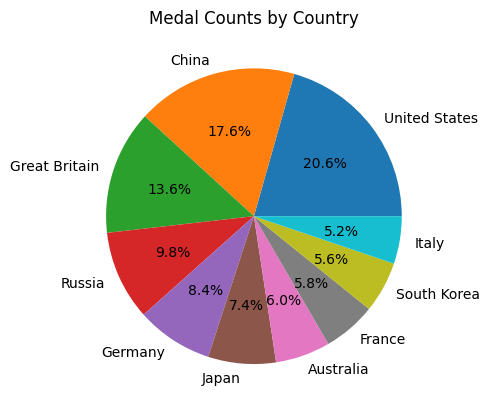

In [23]:
exec(codeRes)

Here is a more "data creative" example:

1. First we get a dataset and cross-tabulate it
2. Then we ask an LLM make the corresponding flow chart, or class-, or state diagram for it

Here is a cross-tabulation of the Titanic dataset (over the sex and class variables):

In [24]:
dfTitanic = pandas.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
dfTitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
ct = pandas.crosstab( index = dfTitanic["sex"], columns = dfTitanic["pclass"] )
ct

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


Here we define an LLM function for obtaining Mermaid code:

In [26]:
fjmmd = llm_function(lambda a, b: f"Transform the JSON data {a} into a Mermaid {b} spec.")

Here we convert the contingency matrix into a flow chart:

In [27]:
print(fjmmd(json.dumps(ct.to_dict()), "flow chart"))



graph TD;
    A[1] --> B[{"female": 94, "male": 122}]
    A --> C[{"female": 76, "male": 108}]
    A --> D[{"female": 144, "male": 347}]


Here is the corresponding Mermaid diagram:

[![](https://mermaid.ink/img/pako:eNpF0L0OgjAUBeBXae6ECSTyE9EOJiAouupGHRq4CNFWgjAYwrvbUIHt9pybL217yN45AoVHw-uS3CImg9S-E8vak7AvUPAXUrLzTKIn23EGJsOxPxi6X01BZPyPQepoIp4JfzMT660i4rE_LoQOTgvhaiKZCdubr-F6vjKSceG8GDq4TAaYILARvMrVA3smCWHQliiQAVVjzpsnAyYHtce79n39ygxo23RoQlfnvMWo4upfBNCCvz44_ADj6VrB?type=png)](https://mermaid.live/edit#pako:eNpF0L0OgjAUBeBXae6ECSTyE9EOJiAouupGHRq4CNFWgjAYwrvbUIHt9pybL217yN45AoVHw-uS3CImg9S-E8vak7AvUPAXUrLzTKIn23EGJsOxPxi6X01BZPyPQepoIp4JfzMT660i4rE_LoQOTgvhaiKZCdubr-F6vjKSceG8GDq4TAaYILARvMrVA3smCWHQliiQAVVjzpsnAyYHtce79n39ygxo23RoQlfnvMWo4upfBNCCvz44_ADj6VrB)

Here we convert the contingency matrix into a state diagram :

In [28]:
print(fjmmd(json.dumps(ct.to_dict()), 'state diagram'))



stateDiagram
    [*] --> 1
    1 --> 2
    2 --> 3
    3 --> [*]

    state 1 {
        [*] --> female: 94
        female --> male: 122
    }

    state 2 {
        [*] --> female: 76
        female --> male: 108
    }

    state 3 {
        [*] --> female: 144
        female --> male: 347
    }


Here is the corresponding Mermaid diagram:

[![](https://mermaid.ink/img/pako:eNpVz7EOgyAQgOFXITdrUpTUlqFT36Ary0WO1gSwQRga47sXo03xpsuXf7iboR81gQTllZ8iRroP-AzolGd5OKvrGzPk0BKT7CpK3pE3zabNMe7OJf_i02XT9hhzIUrftRXdehdU4Cg4HHQ-dF47BfFFjhTIvGoymGxU-Yclp5ji-Pj4HmQMiSpIb_1_C6RBO9HyBeefRxI?type=png)](https://mermaid.live/edit#pako:eNpVz7EOgyAQgOFXITdrUpTUlqFT36Ary0WO1gSwQRga47sXo03xpsuXf7iboR81gQTllZ8iRroP-AzolGd5OKvrGzPk0BKT7CpK3pE3zabNMe7OJf_i02XT9hhzIUrftRXdehdU4Cg4HHQ-dF47BfFFjhTIvGoymGxU-Yclp5ji-Pj4HmQMiSpIb_1_C6RBO9HyBeefRxI)

### Exercise questions

- To which parts of the flowchart above the workflow in this section corresponds to?
- What is preferable: one LLM-function with complicated prompt and argument specs, 
  or several LLM-functions with simply structured prompts and arguments? 

------

## Conversion to Python objects

**Workflow:** We want to retrieve different physical quantities and make corresponding Python objects.
(For further scientific computations with them.)

The following LLM example function transforms different kinds of physical quantity specs into Python code
for the package ["Astropy"](https://github.com/astropy/astropy), [APYp1]:

In [29]:
pu = llm_example_function(
    {'11,042 m/s' : '11_042 * u.m / u.s")', 
     '4,380,042 J' : '4_380_042 * u.J")', 
     '304.342 m/s^2' : '304.342 * u.m / u.s**2'}, 
    e = 'PaLM')

Here is an example of speed query function:

In [30]:
fs = llm_function(lambda a, b: f"What is the average speed of {a} in the units of {b}?", e = 'PaLM')

Here is a concrete query:

In [31]:
rs1 = fs('rocket leaving Earth', 'meters per second')
rs1

'11,186 m/s'

Here we convert the LLM output into Python code for making a unit object:

In [32]:
rs2 = pu(rs1)
rs2

'11186 * u.m / u.s'

Here we evaluate the Python code (into an object):

In [34]:
import astropy.units as u

rs3 = eval(rs2)
rs3

<Quantity 11186. m / s>

Of course, the steps above can be combined into one function.
In general, though, care should be taken to handle or prevent situations in which function inputs and outputs
do not agree with each other.

### Exercise questions

- Can you write a Python function that combines the LLM-functions mentioned above?
- What kind of computations involve the discussed unit objects?

------

## Chemical formulas

**Workflow:** Assume that we want to:

- Obtain a list of Stoichiometry equations according to some criteria
- Evaluate the consistency of the equations
- Find the molecular masses of the components for each equation
- Tabulate the formulas and found component molecular masses

Here we define LLM functions for retrieving chemical formulas with specified species:

In [35]:
cfn = llm_function( lambda a, b: f"Give a list of {a} chemical stoichiometry formulas that include {b}. Give the only formulas. Put the result in JSON format.", 
                    e = 'OpenAI', 
                    form = sub_parser('JSON'))

Here is a query:

In [36]:
chemRes1 = cfn(3, 'sulfur')
chemRes1

['\n\n',
 {'1': 'S + O2 -> SO2',
  '2': '2H2S + 3O2 -> 2H2O + 2SO2',
  '3': 'FeS2 + 7O2 -> Fe2O3 + 2SO2'},
 '']

Let us convince ourselves that we got a list of strings (or not):

In [41]:
deduce_type(chemRes1)

Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 3), Atom(<class 'str'>)])

**Remark:** If the column "balancing" shows two different numbers separated by "=>" that 
means the LLM hallucinated an inconsistent chemical reaction equation.
(Because the LLM does not know, or disregarded for some reason, the 
[law of conservation of mass](https://en.wikipedia.org/wiki/Conservation_of_mass).) 

Here we define a function that parses chemical components using ["chempy"](https://pypi.org/project/chempy/), [BDp1]:

In [42]:
from chempy import Substance

def chem_component(x):
  try:
    res = Substance.from_formula(x)
    return res.mass
  except:
    return None

Here we split strings of the equations:

In [43]:
import re

{k: re.split(r"->|\+", v) for k, v in chemRes1[1].items()}

{'1': ['S ', ' O2 ', ' SO2'],
 '2': ['2H2S ', ' 3O2 ', ' 2H2O ', ' 2SO2'],
 '3': ['FeS2 ', ' 7O2 ', ' Fe2O3 ', ' 2SO2']}

Here for each formula we extract the chemical components and find the corresponding molecular masses:

In [44]:
{k: [ chem_component(x) for x in re.split(r"\->|\+", v)] for k, v in chemRes1[1].items()}

{'1': [32.06, 31.998, 64.058],
 '2': [None, None, None, None],
 '3': [119.965, None, 159.687, None]}

Since parsing in the statement above is not able to find chemical terms (i.e. `factor * <formula>`) let us write a dedicated function that givens records for all chemical terms in a chemical expression strings:

In [45]:
def chem_masses_records(chemExpr):
    chemMasses = []
    for s in re.finditer(r'(\d*)([A-Z]\S*)', chemExpr):
        term = ''.join(s.groups())
        factor = 1
        if len(s.groups()[0]) > 0:
            factor = eval(s.groups()[0])
        mass = chem_component(s.groups()[1])
        record = {"term" : term,  "factor" : factor, "formula" : s.groups()[1]}
        if mass is None:
            chemMasses = chemMasses + [record | {"mass" : None},]
        else:
            chemMasses = chemMasses + [record | {"mass" : factor * mass}, ]   
            
    return chemMasses

Here is an example application:

In [46]:
chem_masses_records("2SO2")

[{'term': '2SO2', 'factor': 2, 'formula': 'SO2', 'mass': 128.116}]

Here for each LLM generated stoichiometry formula we find the masses of the components of Left Hand Side (LHS) and Right Hand Side (RHS):

In [47]:
pres = [ [ {"eq" : v, "side": "LHS"} | rec for rec in chem_masses_records(v.split("->")[0])] for k, v in chemRes1[1].items()]
pres2 = [item for sl in pres for item in sl]
pres = [ [ {"eq" : v, "side": "RHS"} | rec for rec in chem_masses_records(v.split("->")[1])] for k, v in chemRes1[1].items()]
pres3 = [item for sl in pres for item in sl]
pres4 = pres2 + pres3
dfEqs = pandas.DataFrame(pres4)
dfEqs = dfEqs.sort_values( ["eq", "side"] )
dfEqs

,eq,side,term,factor,formula,mass
2,2H2S + 3O2 -> 2H2O + 2SO2,LHS,2H2S,2,H2S,68.152
3,2H2S + 3O2 -> 2H2O + 2SO2,LHS,3O2,3,O2,95.994
7,2H2S + 3O2 -> 2H2O + 2SO2,RHS,2H2O,2,H2O,36.030
8,2H2S + 3O2 -> 2H2O + 2SO2,RHS,2SO2,2,SO2,128.116
4,FeS2 + 7O2 -> Fe2O3 + 2SO2,LHS,FeS2,1,FeS2,119.965
5,FeS2 + 7O2 -> Fe2O3 + 2SO2,LHS,7O2,7,O2,223.986
9,FeS2 + 7O2 -> Fe2O3 + 2SO2,RHS,Fe2O3,1,Fe2O3,159.687
10,FeS2 + 7O2 -> Fe2O3 + 2SO2,RHS,2SO2,2,SO2,128.116
0,S + O2 -> SO2,LHS,S,1,S,32.060
1,S + O2 -> SO2,LHS,O2,1,O2,31.998


Here we can see are all of the formulas (hallucinated by the LLMs) balanced:

In [48]:
dfEqs.groupby(["eq", "side"])["mass"].agg("sum")

eq                          side
2H2S + 3O2 -> 2H2O + 2SO2   LHS     164.146
                            RHS     164.146
FeS2 + 7O2 -> Fe2O3 + 2SO2  LHS     343.951
                            RHS     287.803
S + O2 -> SO2               LHS      64.058
                            RHS      64.058
Name: mass, dtype: float64

### Alternative workflow and solution

Assume that we only wanted to extract the chemical components together with their molecular masses
from the LLM generated equations.

Then we:
- Use the function like the function `chem_component` defined above as a sub-parser in the retrieval LLM-function
- Pick tuples (or other related objects) from the LLM function result 

Here is a sub-parser definition:

In [49]:
def chem_component2(x):
    chemComps = []
    for s in re.finditer(r'([A-Z]\w*)', x):
        comp = s.groups()[0]
        res = chem_component(comp)
        if res is not None:
            chemComps = chemComps +[comp,]
    return chemComps
    

Here is the LLM function:

In [50]:
cfnp = llm_function( lambda a, b: f"Give {a} chemical stoichiometry formulas that includes {b}.", llm_evaluator = 'OpenAI', form = sub_parser(chem_component2))

Here is an invocation:

In [51]:
chemRes2 = cfnp(4, 'sulfur and hydrogen')
chemRes2

['H2S', 'H2S2', 'S3H3', 'S4H6']

### Exercise questions

- What is a good approach to evaluate the ability of LLMs to respect the conservation of mass law?
- Is it better for that evaluation to use predominantly Python code or mostly LLM-functions?

------

## Named entity recognition

**Workflow:** We want to download text from the Web, extract the names of certain types of entities from it,
and visualize relationships between them.

For example, we might want to extract all album names and their release dates from
a biographical web page of a certain music artist, and make a timeline plot.

In [52]:
fner = llm_function(lambda a, b: f"Extract {a} from the text: {b} . Give the result in a JSON format", e = 'OpenAI', form = sub_parser('JSON'))

Here is a way to get a biography and discography text data of a music artist from Wikipedia:

In [53]:
import urllib.request

url = 'https://en.wikipedia.org/wiki/Boris_Brejcha'

try:
   with urllib.request.urlopen(url) as f:
       text = f.read().strip().decode("utf-8")
       print(len(text))
except urllib.error.URLError as e:
    print(e.reason)

87328


But now we have to convert the HTML code into plain text, *and* the text is too large
to process all at once with LLMs. (Currently LLMs have ≈ 4096 ± 2048 input tokens limits.)

**Remark:** A more completely worked out workflow would have included 
the breaking up of the text into suitably sized chunks, and combining the LLM processed results.

Instead, we are going to ask an LLM to produce artist's bio and discography and then 
we going to pretend we got it from some repository or encyclopedia.

Here we get the text:

In [54]:
text = llm_function('', e = llm_configuration('OpenAI', max_tokens=500))("What is Boris Brejcha's bio and discography?")
print(text)



Boris Brejcha is a German electronic music producer and DJ. He was born on November 26, 1981 in Ludwigshafen, Germany. He started his music career in 2006 and has since become a prominent figure in the techno and minimal techno scene.

Brejcha's music is characterized by a fusion of techno, minimal, and electro elements, often incorporating melodic and atmospheric elements into his tracks. He is also known for his signature mask, which he wears during his performances.

Brejcha has released numerous EPs and albums throughout his career, including "Die Maschinen Sind Gestrandet" (2007), "My Name is" (2010), "Feuerfalter Part 01" (2012), "22" (2014), "Feuerfalter Part 02" (2016), "22: The Remixes" (2017), and "Feuerfalter Special Edition" (2018).

In addition to his solo work, Brejcha has collaborated with other artists such as Ann Clue, Deniz Bul, and Laura Korinth. He has also remixed tracks for artists like Stephan Bodzin, Oliver Koletzki, and Joachim Pastor.

Brejcha has performed 

Here we do Named Entity Recognition (NER) via the LLM function defined above:

In [55]:
albRes = fner('album names and years', text)
albRes

['\n\n',
 {'albums': [{'name': 'Die Maschinen Sind Gestrandet', 'year': 2007},
   {'name': 'My Name is', 'year': 2010},
   {'name': 'Feuerfalter Part 01', 'year': 2012},
   {'name': '22', 'year': 2014},
   {'name': 'Feuerfalter Part 02', 'year': 2016},
   {'name': '22: The Remixes', 'year': 2017},
   {'name': 'Feuerfalter Special Edition', 'year': 2018}]},
 '']

**Remark:** LLMs can produce NER data in several different structures. 
Using the function `deduce_type` from Python's package
["DataTypeSystem"](https://pypi.org/project/DataTypeSystem/), [AAp6],
can help required post-processing: see [AA3].

Based in our study of the result data type signatures, in this workflow we process result of `fner` with this code:

In [56]:
albRes2 = [x for x in albRes if isinstance(x, dict)]

if not any(isinstance(x, dict) for x in albRes2):
    albRes2 = {'albums': albRes2}

print(albRes2)


[{'albums': [{'name': 'Die Maschinen Sind Gestrandet', 'year': 2007}, {'name': 'My Name is', 'year': 2010}, {'name': 'Feuerfalter Part 01', 'year': 2012}, {'name': '22', 'year': 2014}, {'name': 'Feuerfalter Part 02', 'year': 2016}, {'name': '22: The Remixes', 'year': 2017}, {'name': 'Feuerfalter Special Edition', 'year': 2018}]}]


Here we tabulate the result:

In [57]:
dfDiscography = pandas.DataFrame.from_dict(albRes2)
dfDiscography

,albums
0,"[{'name': 'Die Maschinen Sind Gestrandet', 'ye..."


Here we make a Mermaid-JS timeline plot (after we have figured out the structure of LLM's function output):

In [58]:
codeRes = fjp(json.dumps(dfDiscography.to_dict()), "time line plot")
print(codeRes)



import matplotlib.pyplot as plt
import json

# Load the JSON data
data = '{"albums": {"0": [{"name": "Die Maschinen Sind Gestrandet", "year": 2007}, {"name": "My Name is", "year": 2010}, {"name": "Feuerfalter Part 01", "year": 2012}, {"name": "22", "year": 2014}, {"name": "Feuerfalter Part 02", "year": 2016}, {"name": "22: The Remixes", "year": 2017}, {"name": "Feuerfalter Special Edition", "year": 2018}]}}'
data = json.loads(data)

# Extract the album names and years
albums = data["albums"]["0"]
names = [album["name"] for album in albums]
years = [album["year"] for album in albums]

# Create a time line plot
plt.plot(years, names)
plt.xlabel("Year")
plt.ylabel("Album Name")
plt.title("Album Release Timeline")
plt.show()


Here the generated code above is pasted in the code cell and evaluated: 

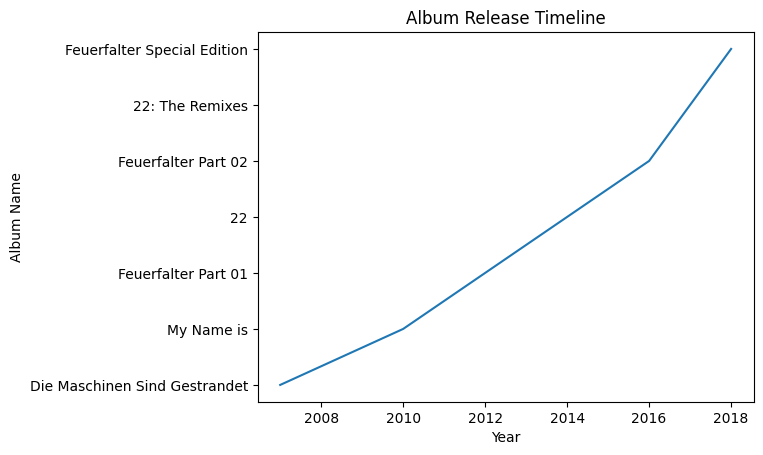

In [59]:
exec(codeRes.replace("plt.title('Album Release Timeline", ""))

### Exercise questions

- How the LLM-functions pipeline above should be changed in order to produce timeline plots of different wars?
- How the Python code should be changed in order to produce timeline plots with [Mermaid-JS](https://mermaid.js.org)? 

------

## Statistics of output data types

**Workflow:** We want to see and evaluate the distribution of data types of LLM-function results:
1. Make a pipeline of LLM-functions
2. Create a list of random inputs "expected" by the pipeline
   - Or use the same input multiple times.
3. Deduce the data type of each output
4. Compute descriptive statistics

**Remark:** These kind of statistical workflows can be slow and expensive.
(With the current line-up of LLM services.)

Let us reuse the workflow from the previous section and enhance it with 
data type outputs finding. More precisely we:
1. Generate random music artist names (using an LLM query)
2. Retrieve short biography and discography for each music artist
3. Extract album-and-release-date data for each artist (with NER-by-LLM)
4. Deduce the type for each output, using several different type representations

The data types are investigated with the functions `deduce_type` and `record_types` of 
["DataTypeSystem"](https://pypi.org/project/DataTypeSystem/), [AAp5].

Here we define a data retrieval function:

In [60]:
fdb = llm_function(lambda x: f"What is the short biography and discography of the artist {x}?", e = llm_configuration('PaLM', max_tokens= 500))

Here we define (again) the NER function:

In [61]:
fner = llm_function(lambda a, b: f"Extract {a} from the text: {b} . Give the result in a JSON format", e = 'PaLM', form = sub_parser('JSON'))

Here we find 10 random music artists:

In [62]:
artistNames = llm_function('',e='PaLM')("Give 10 random music artist names in a list in JSON format.", 
                                        form = sub_parser('JSON'))
artistNames

['```json\n[\n  ',
 {'name': 'Taylor Swift'},
 ',\n  ',
 {'name': 'Adele'},
 ',\n  ',
 {'name': 'Ed Sheeran'},
 ',\n  ',
 {'name': 'Justin Bieber'},
 ',\n  ',
 {'name': 'Rihanna'},
 ',\n  ',
 {'name': 'Katy Perry'},
 ',\n  ',
 {'name': 'Lady Gaga'},
 ',\n  ',
 {'name': 'Bruno Mars'},
 ',\n  ',
 {'name': 'The Weeknd'},
 ',\n  ',
 {'name': 'Kendrick Lamar'},
 '\n]\n```']

In [63]:
artistNames2 = [list(item.items())[0][1] for item in artistNames if isinstance(item, dict)]
artistNames2

['Taylor Swift',
 'Adele',
 'Ed Sheeran',
 'Justin Bieber',
 'Rihanna',
 'Katy Perry',
 'Lady Gaga',
 'Bruno Mars',
 'The Weeknd',
 'Kendrick Lamar']

Here is a loop that generates the biographies and does NER over them:

In [64]:
dbRes = []
for a in artistNames2:
    text = fdb(a)
    recs = fner('album names and release dates', text)    
    dbRes = dbRes + [recs, ]

dbRes

[['```json\n',
  {'albums': [{'name': 'Taylor Swift', 'release_date': '2006'},
    {'name': 'Fearless', 'release_date': '2008'},
    {'name': 'Speak Now', 'release_date': '2010'},
    {'name': 'Red', 'release_date': '2012'},
    {'name': '1989', 'release_date': '2014'},
    {'name': 'Reputation', 'release_date': '2017'},
    {'name': 'Lover', 'release_date': '2019'},
    {'name': 'Folklore', 'release_date': '2020'},
    {'name': 'Evermore', 'release_date': '2020'}]},
  '\n```'],
 ['```json\n',
  {'albums': [{'name': '19', 'release_date': '2008'},
    {'name': '21', 'release_date': '2011'},
    {'name': '25', 'release_date': '2015'},
    {'name': '30', 'release_date': '2021'}]},
  '\n```'],
 ['```json\n',
  {'albums': [{'name': 'No. 5 Collaborations Project', 'release_date': '2011'},
    {'name': '+', 'release_date': '2011'},
    {'name': '×', 'release_date': '2014'},
    {'name': '÷', 'release_date': '2017'},
    {'name': 'No. 6 Collaborations Project', 'release_date': '2019'},
    {'n

Here we call `deduce_type` on each LLM output:

In [65]:
[deduce_type(x) for x in dbRes]

[Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 9), 1), Atom(<class 'str'>)]),
 Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 4), 1), Atom(<class 'str'>)]),
 Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 6), 1), Atom(<class 'str'>)]),
 Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 5), 1), Atom(<class 'str'>)]),
 Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 9), 1), Atom(<class 'str'>)]),
 Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 6), 1), Atom(<class 'str'>)]),
 Tuple([Atom(<class 'str'>), Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 5), 1), A

Here we redo the type deduction using the argument setting `tally=True`:

In [66]:
[deduce_type(x, tally=True) for x in dbRes]

[Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 9), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 4), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 6), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 5), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 9), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 6), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple([("Assoc(Atom(<class 'str'>), Vector(Assoc(Atom(<class 'str'>), Atom(<class 'str'>), 2), 5), 1)", 1), ("Atom(<class 'str'>)", 2)], 3),
 Tuple

We see that the LLM outputs produce lists of dictionaries "surrounded" by strings; each dictionary has with one rule:

In [67]:
[record_types(x) for x in dbRes]

[[str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str],
 [str, dict, str]]

Another record types finding call over the dictionaries:

In [80]:
[record_types(x[1]) for x in dbRes]

[{'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list},
 {'albums': list}]

The statistics show that most likely the output we get from the execution of the LLM-functions pipeline
is a list of a string and a dictionary. The dictionaries are most likely to be of length one, with "albums" as the key.

------

## Other workflows

In the future other workflows are going to be described:

- Interactive building of grammars
- Using LLM-based code writing assistants
- Test suite generation via Gherkin specifications
  - Here is a [teaser](https://github.com/antononcube/Raku-LLM-Functions/blob/main/docs/Convert-tests-into-Gherkin-specs_woven.md).
- (Reliable) code generation from help pages

Most likely all of the listed workflows would use chat objects and engineered prompts.

------

## References

### Articles

[AA1] Anton Antonov,
["Generating documents via templates and LLMs"](https://rakuforprediction.wordpress.com/2023/07/11/generating-documents-via-templates-and-llms/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA2] Anton Antonov,
["Connecting Mathematica and Raku"](https://rakuforprediction.wordpress.com/2021/12/30/connecting-mathematica-and-raku/),
(2021),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[SW1] Stephen Wolfram,
["The New World of LLM Functions: Integrating LLM Technology into the Wolfram Language"](https://writings.stephenwolfram.com/2023/05/the-new-world-of-llm-functions-integrating-llm-technology-into-the-wolfram-language/),
(2023),
[Stephen Wolfram Writings](https://writings.stephenwolfram.com).

### Repositories, sites

[WRIr1] Wolfram Research, Inc.
[Wolfram Prompt Repository](https://resources.wolframcloud.com/PromptRepository/).

### Packages, paclets

[AAp1] Anton Antonov,
[LLMFunctionObjects Python package](https://github.com/antononcube/Python-packages/tree/main/LLMFunctionObjects),
(2023),
[Python-packages at GitHub/antononcube](https://github.com/antononcube/Python-packages).

[AAp2] Anton Antonov,
[LLMPrompts Python package](hhttps://github.com/antononcube/Python-packages/tree/main/LLMPrompts),
(2023),
[Python-packages at GitHub/antononcube](https://github.com/antononcube/Python-packages).

[AAp3] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[LLM::Prompts Raku package](https://github.com/antononcube/Raku-LLM-Prompts),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov,
[DataTypeSystem Python package](https://pypi.org/project/DataTypeSystem/),
(2023),
[PyPI.org/antononcube](https://pypi.org/user/antononcube/).

[APYp1] Astropy, 
[Astropy](https://github.com/astropy/astropy),
(2023),
[GitHub/astropy](https://github.com/astropy).

[BDp1] Bjorn Dahlgren, [chempy](https://github.com/bjodah/chempy), (2023), [GitHub/bjodah](https://github.com/bjodah). 

[GAIp1] Google AI,
[google-generativeai (Google Generative AI Python Client)](https://pypi.org/project/google-generativeai/),
(2023),
[PyPI.org/google-ai](https://pypi.org/user/google-ai/).

[OAIp1] OpenAI, 
[openai (OpenAI Python Library)](https://pypi.org/project/openai/),
(2020-2023),
[PyPI.org](https://pypi.org/).

[WRIp1] Wolfram Research, Inc.,
[LLMFunctions WL paclet](https://resources.wolframcloud.com/PacletRepository/resources/Wolfram/LLMFunctions/),
(2023),
[Wolfram Language Paclet Repository](https://resources.wolframcloud.com/PacletRepository/).